In [50]:
import numpy as np
from mvlearn.embed import GCCA

from scipy.sparse.linalg import svds
from scipy.linalg import svd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [10]:
def get_sim_data(col1, col2, n=10, m=20):
    data = np.random.normal(0,1,(n,m))
    
    data[:,col1] = np.arange(0,n)
    data[:,col2] = np.arange(0,n)*2
    
    return data

In [19]:
Xs = [get_sim_data(1,2), get_sim_data(2,3)]

In [26]:
gcca = GCCA(n_components = 1)
gcca = gcca.fit(Xs)

In [27]:
gcca.projection_mats_[0].shape

(20, 1)

In [28]:
gcca.projection_mats_

[array([[-0.0167737 ],
        [-0.16034433],
        [-0.28754872],
        [ 0.06550679],
        [ 0.01815778],
        [ 0.04519624],
        [ 0.04373693],
        [-0.02680102],
        [ 0.15786245],
        [ 0.09678667],
        [-0.03457784],
        [-0.01789577],
        [ 0.15394803],
        [ 0.03327183],
        [ 0.12870555],
        [-0.02268031],
        [ 0.02644803],
        [-0.01531168],
        [-0.17990159],
        [-0.00778536]]), array([[-0.09759915],
        [-0.13269796],
        [-0.15152918],
        [-0.3159278 ],
        [ 0.18449338],
        [ 0.10773194],
        [ 0.12490782],
        [ 0.13253195],
        [ 0.01529562],
        [ 0.01977448],
        [ 0.09864517],
        [ 0.03090167],
        [ 0.027295  ],
        [-0.04816371],
        [-0.03887536],
        [ 0.00033623],
        [ 0.06146059],
        [-0.03983715],
        [-0.0976954 ],
        [ 0.11895185]])]

In [33]:
svds(Xs[0], k=1)

(array([[-0.00132594],
        [ 0.06532314],
        [ 0.11685842],
        [ 0.17964197],
        [ 0.24097135],
        [ 0.2939599 ],
        [ 0.35318609],
        [ 0.41379303],
        [ 0.47378104],
        [ 0.53375166]]),
 array([37.97289882]),
 array([[-0.04049051,  0.44456263,  0.88912526, -0.02299431, -0.00522108,
         -0.01891121, -0.00513678,  0.00891988, -0.01680854, -0.04145567,
         -0.03284736, -0.01936701,  0.01570919,  0.01599571, -0.01362291,
          0.02640933, -0.00338858, -0.03839925, -0.03013136,  0.04389293]]))

In [69]:
cov = Xs[1].T @ Xs[1]

In [70]:
U,D,V = svd(cov)

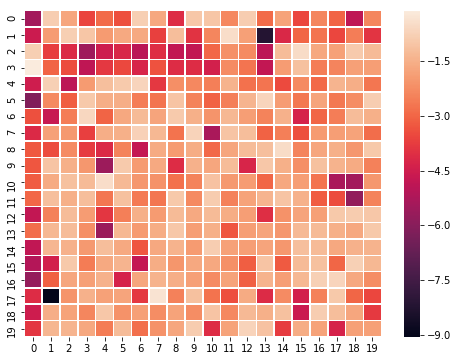

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(np.log(np.abs(U)), linewidth=0.5)
plt.show()

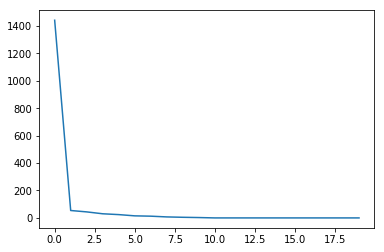

In [44]:
plt.plot(np.arange(len(D)), D)

In [72]:
help(GCCA)

Help on class GCCA in module mvlearn.embed.gcca:

class GCCA(mvlearn.embed.base.BaseEmbed)
 |  GCCA(fraction_var=None, sv_tolerance=None, n_components=None, n_elbows=2, tall=False)
 |  
 |  An implementation of Generalized Canonical Correalation Analysis. Computes
 |  individual projections into a common subspace such that the correlations
 |  between pairwise projections are minimized (ie. maximize pairwise
 |  correlation). Reduces to CCA in the two sample case.
 |  
 |  Parameters
 |  ----------
 |  sv_tolerance : float, optional, default=None
 |      Selects the number of SVD components to keep for each view by
 |      thresholding singular values. If none, another selection
 |      method is used.
 |  n_components : int (positive), optional, default=None
 |      If ``self.sv_tolerance=None``, selects the number of SVD
 |      components to keep for each view. If none, another selection
 |      method is used.
 |  fraction_var : float, default=None
 |      If ``self.sv_tolerance=No